# PyVIMS

This notebook provide and a set of examples to illustrate the manipulation of Cassini VIMS data in Python with the [`pyvims`](https://pypi.org/project/pyvims/) module.

To install it, please refere to the [project README](https://github.com/seignovert/pyvims).

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from pyvims import VIMS

## Getting the data

You no longer need to pre-download the VIMS cube to load them in `pyvims`. If the cube is located on a known icy moon of Saturn, and if the file is not present locally, the module will query the VIMS Data Portal from the university of Nantes: [vims.univ-nantes.fr](https://vims.univ-nantes.fr) to retreive the latest calibrated version of the cube. The calibration process is decribed [here](https://vims.univ-nantes.fr/info/isis-calibration). You can also provide your own cubes, if you want.

In [2]:
cube = VIMS('1487096932_1')

cube

<VIMS> Cube: 1487096932_1
 - Size: (42, 42)
 - Channel: IR
 - Mode: NORMAL
 - Start time: 2005-02-14 18:02:29.023000
 - Stop time: 2005-02-14 18:07:32.930000
 - Exposure: 0.16276 sec
 - Duration: 0:05:03.907000
 - Main target: TITAN
 - Flyby: T3

If you already host some VIMS data locally, you can use the `root=<PATH_FOLDER>` attribute to locate them directly. You can also set the environnement variable `VIMS_DATA` to specify the default `root` value to use. Otherwise, the current working directely will be used.

By default only the infrared channel will be loaded but you can get the visible with the `channel` attribute.

In [3]:
VIMS('1487096932_1', channel='vis').fname

'C1487096932_1_vis.cub'

## Extract metadata

The `VIMS` object provide a direct access to a subset of the cube metedata.
Here is a list of properties available:

In [4]:
print(f'Cube name: {cube}')
print(f'Filename: {cube.fname}')
print(f'Acquisition start time: {cube.start}')
print(f'Acquisition stop time: {cube.stop}')
print(f'Cube mid-time: {cube.time}')
print(f'Exposure duration: {cube.expo}')
print(f'Channel: {cube.channel}')
print(f'Cube data size: {cube.NB, cube.NL, cube.NS}')
print(f'Acquisition mode: {cube.mode}')
print(f'Main target name: {cube.target_name}')
print(f'Flyby id: {cube.flyby}')

Cube name: 1487096932_1
Filename: C1487096932_1_ir.cub
Acquisition start time: 2005-02-14 18:02:29.023000
Acquisition stop time: 2005-02-14 18:07:32.930000
Cube mid-time: 2005-02-14 18:05:00.976500
Exposure duration: 0.16276
Channel: IR
Cube data size: (256, 42, 42)
Acquisition mode: NORMAL
Main target name: TITAN
Flyby id: T3


To get the full list of attribute use the `help(cube)` function.

## Extract data

### By band

Extract the image for a specfic band, we should use the `@` operator and provide the band id as an `int`:

In [5]:
cube@167

array([[-5.4426567e-04, -1.3694621e-04, -9.3489932e-04, ...,
         6.3502282e-02,  5.7736006e-02,  5.2320253e-02],
       [-5.4470141e-04, -1.4113497e-04, -1.4001154e-04, ...,
         6.7836367e-02,  6.3464731e-02,  5.8084715e-02],
       [ 2.5238303e-04,  2.5037612e-04, -1.4415705e-04, ...,
         7.2807170e-02,  6.7784242e-02,  6.4127207e-02],
       ...,
       [ 4.5216573e-05, -6.5096840e-04,  4.4637396e-05, ...,
        -2.7215341e-04,  3.5355415e-04,  4.0521652e-05],
       [ 4.0477469e-05,  4.0214873e-05, -3.0602355e-04, ...,
         3.4900461e-04,  3.6208461e-05, -2.7794950e-04],
       [-3.1504055e-04, -3.1299971e-04,  3.5281686e-05, ...,
         3.1918044e-05,  3.1983360e-05,  3.2059252e-05]], dtype=float32)

### By wavelength

The same apply for a specific wavelength but this time you should use a `float`:

In [6]:
cube@2.03

array([[-5.4426567e-04, -1.3694621e-04, -9.3489932e-04, ...,
         6.3502282e-02,  5.7736006e-02,  5.2320253e-02],
       [-5.4470141e-04, -1.4113497e-04, -1.4001154e-04, ...,
         6.7836367e-02,  6.3464731e-02,  5.8084715e-02],
       [ 2.5238303e-04,  2.5037612e-04, -1.4415705e-04, ...,
         7.2807170e-02,  6.7784242e-02,  6.4127207e-02],
       ...,
       [ 4.5216573e-05, -6.5096840e-04,  4.4637396e-05, ...,
        -2.7215341e-04,  3.5355415e-04,  4.0521652e-05],
       [ 4.0477469e-05,  4.0214873e-05, -3.0602355e-04, ...,
         3.4900461e-04,  3.6208461e-05, -2.7794950e-04],
       [-3.1504055e-04, -3.1299971e-04,  3.5281686e-05, ...,
         3.1918044e-05,  3.1983360e-05,  3.2059252e-05]], dtype=float32)

__Note:__ For now, the wavelength are not interpolated on the channels wavelengths. The output image correspond to the closes wavelength

### Alternative notations

Alternatively, you can also use the array index notation `[]` instead of the `@` symbol:

In [7]:
cube[167]

array([[-5.4426567e-04, -1.3694621e-04, -9.3489932e-04, ...,
         6.3502282e-02,  5.7736006e-02,  5.2320253e-02],
       [-5.4470141e-04, -1.4113497e-04, -1.4001154e-04, ...,
         6.7836367e-02,  6.3464731e-02,  5.8084715e-02],
       [ 2.5238303e-04,  2.5037612e-04, -1.4415705e-04, ...,
         7.2807170e-02,  6.7784242e-02,  6.4127207e-02],
       ...,
       [ 4.5216573e-05, -6.5096840e-04,  4.4637396e-05, ...,
        -2.7215341e-04,  3.5355415e-04,  4.0521652e-05],
       [ 4.0477469e-05,  4.0214873e-05, -3.0602355e-04, ...,
         3.4900461e-04,  3.6208461e-05, -2.7794950e-04],
       [-3.1504055e-04, -3.1299971e-04,  3.5281686e-05, ...,
         3.1918044e-05,  3.1983360e-05,  3.2059252e-05]], dtype=float32)

In that case, you can also average multiply channels at once (here between 4.9 and 5.1 µm):

In [8]:
cube[4.9:5.1]

array([[ 1.3178028e-04, -3.2443570e-03, -4.3467716e-03, ...,
         1.4534194e-02,  1.4463064e-02,  9.8138256e-03],
       [-3.9696177e-03, -1.7385007e-03, -1.4342158e-03, ...,
         1.7016988e-02,  1.2536096e-02,  1.0228974e-02],
       [-3.0495692e-03, -1.6311830e-03, -3.5014625e-03, ...,
         2.1036707e-02,  1.7189564e-02,  1.5042666e-02],
       ...,
       [-2.4971021e-03, -2.6065365e-03, -1.0186726e-03, ...,
        -3.3641427e-05,  1.1997432e-03, -1.0363706e-03],
       [ 2.5132869e-04, -1.1007236e-03, -1.8827086e-03, ...,
        -2.5637613e-03,  2.5225503e-02, -5.2994845e-04],
       [-1.2124524e-03, -2.9152555e-03, -1.0429876e-03, ...,
        -1.3088164e-03, -2.5265126e-03, -1.9491642e-03]], dtype=float32)

Finally, if you provide 3 argument, you will get a 3D array `(NL, NS, 3)`to make RGB composite:

In [9]:
cube[2.03, 1.58, 2.79].shape

(42, 42, 3)

The alternative operation with the `@` symbol will require to add `'i:j'` around each channel:

In [10]:
img = cube@('165:169', '138:141', '212:213')
img.shape

(42, 42, 3)

### Pixel spectrun

To extract a specific pixel, you need to provide the pixel coordinates as `[S, L]`:

In [11]:
cube[20, 15]

<VIMSPixel> 1487096932_1-S20_L15
 - Sample: 20
 - Line: 15
 - Lon: 147°W
 - Lat: 29°S
 - Alt: 0 km (Ground pixel)

__Note:__ The VIMS, the first pixel is `[1, 1]` located on the top left corner and the last pixel is at `[NS, NL]` on the bottom right corner.

The `tuple` index notation also works:

In [12]:
pixel = cube@(20, 15)

Each VIMS pixel object contains its spectrum and its geographic information as attributes:

In [13]:
pixel.spectrum.shape, pixel.spectrum[0], pixel.lon, pixel.lat, pixel.inc, pixel.eme, pixel.phase

((256,),
 0.057296515,
 147.20692921784078,
 -29.281103074212687,
 7.461604110098367,
 26.32574037885915,
 20.066416805308123)

If you try to access a pixel outsite the range available, an `VIMSError` will be throw:

In [14]:
from pyvims.errors import VIMSError

try:
    pixel = cube[1, 100]
except VIMSError as err:
    print(err)

Line must be between `1` and `42`.


## Plot cube

### Plot image

Based on the previous section, you can perform cube various plots based on the cube data:

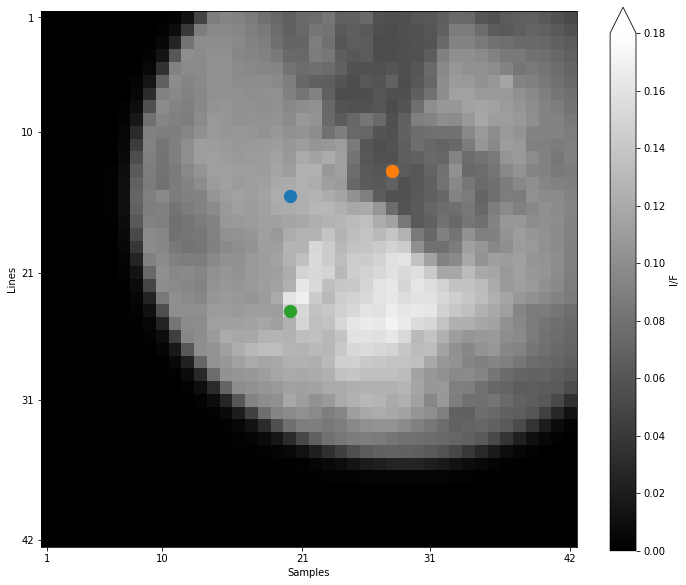

In [15]:
plt.figure(figsize=(12, 10))

plt.imshow(cube@2.03, extent=cube.extent, cmap='gray', vmin=0, vmax=.18)

plt.colorbar(extend='max', label='I/F')

plt.scatter(20, 15, s=150)
plt.scatter(28, 13, s=150)
plt.scatter(20, 24, s=150)

plt.xlabel(cube.slabel)
plt.ylabel(cube.llabel)

plt.xticks(cube.sticks)
plt.yticks(cube.lticks);

__Note__: If you overplot data on the image, it is highly recommanded to add the `extent` attribute in the `imshow` function to display the image between `[1, 1]` and `[NS, NL]` and not between `[0, 0]` and `[NS-1, NL-1]` as python do by default.

Some shortcuts are also available to add nice ticks and labels.

### Plot spectra

You can also plot cube spectra for the previously labeled pixels (with some offsets):

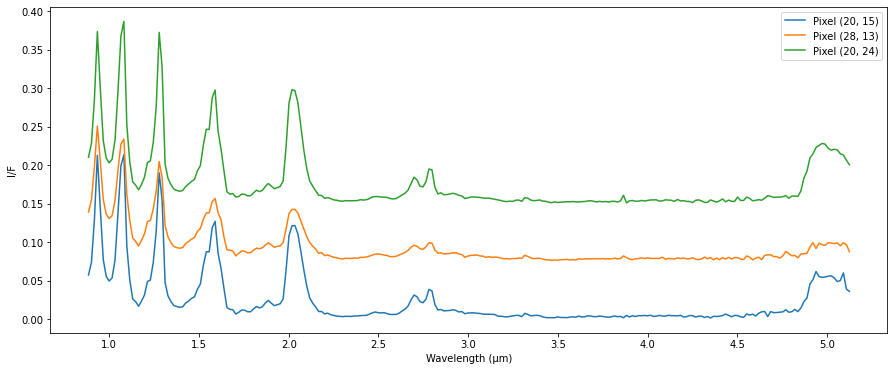

In [16]:
plt.figure(figsize=(15, 6))

plt.plot(cube.wvlns, cube[20, 15].spectrum + .000, '-', label='Pixel (20, 15)')
plt.plot(cube.wvlns, cube[28, 13].spectrum + .075, '-', label='Pixel (28, 13)')
plt.plot(cube.wvlns, cube[20, 24].spectrum + .150, '-', label='Pixel (20, 24)')

plt.legend()

plt.xlabel(cube.wlabel)
plt.ylabel(cube.ilabel)

plt.xticks(cube.wticks);

## Cube projections

VIMS-IR is a 2D mirror scanning instrument (1D for VIMS-VIS), therefore the image recorded is not instantaneous acuisition. Each individual pixel neeed to be projected on the targeted body frame to reconstruct a consistant image. In order to make this manipulation more easily, we implemented a collection of a few usefull projection.


### Sky projection

It correspond to the pixel pointing orientation in sky coordinates (right-ascension and declination).

This projection can be used to make star detection based on their coordinates.

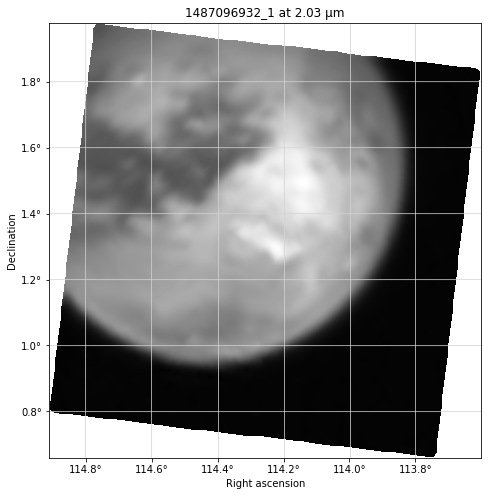

In [17]:
cube.plot(2.03, 'sky');

__Note:__ If the spacecraft move too much during the acquisition the actual data may produce a distorded image.

### Orthographic projection

This projection correspond to the smallest, non distorded representation of the cube.
It provides the best way to add geographic grid coordinate on the image.
The projection is made in the mean observation plane of the observation.

Here, we use the RGB notation to get a colored image:

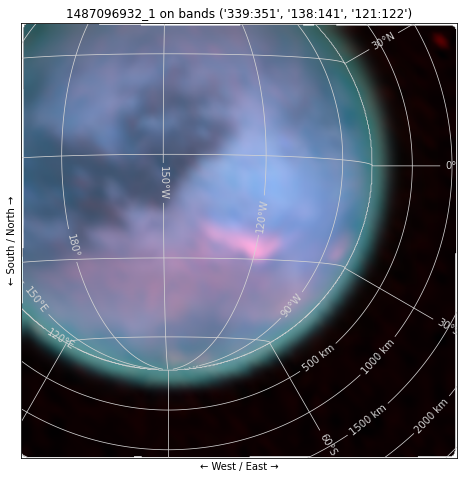

In [18]:
cube.plot(('339:351', '138:141', '121:122'), 'ortho');

### Polar projection

To observe the poles, you can use the polar projection. The choice of the pole to display is based on the location of the sub-spacecraft latitude.

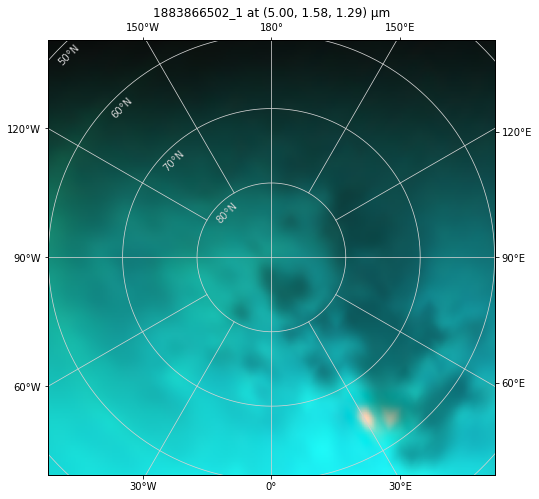

In [19]:
polar_cube = VIMS('1883866502_1')

polar_cube.plot((5.0, 1.58, 1.29), 'polar');

### Requirectangular projection

Finally, a longitude/latitude projection is also available:

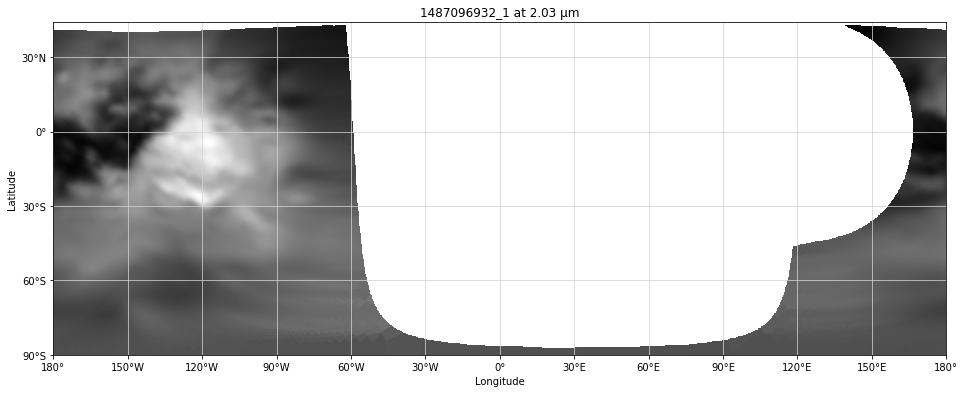

In [20]:
cube.plot(2.03, 'equi');

## Project VIMS cube ground pixels on basemaps

Load `Titan_VIMS_ISS` map from MAPS registry (provided with this package).

In [21]:
from pyvims.misc import MAPS

bg = MAPS['Titan_VIMS_ISS']

bg

<Map> Titan_VIMS_ISS.jpg
 - Extent: [180.0, -180.0, -90.0, 90.0]
 - Source: Seignovert et al. 2019
 - URL: https://doi.org/10.22002/D1.1173
 - Projection: Equirectangular

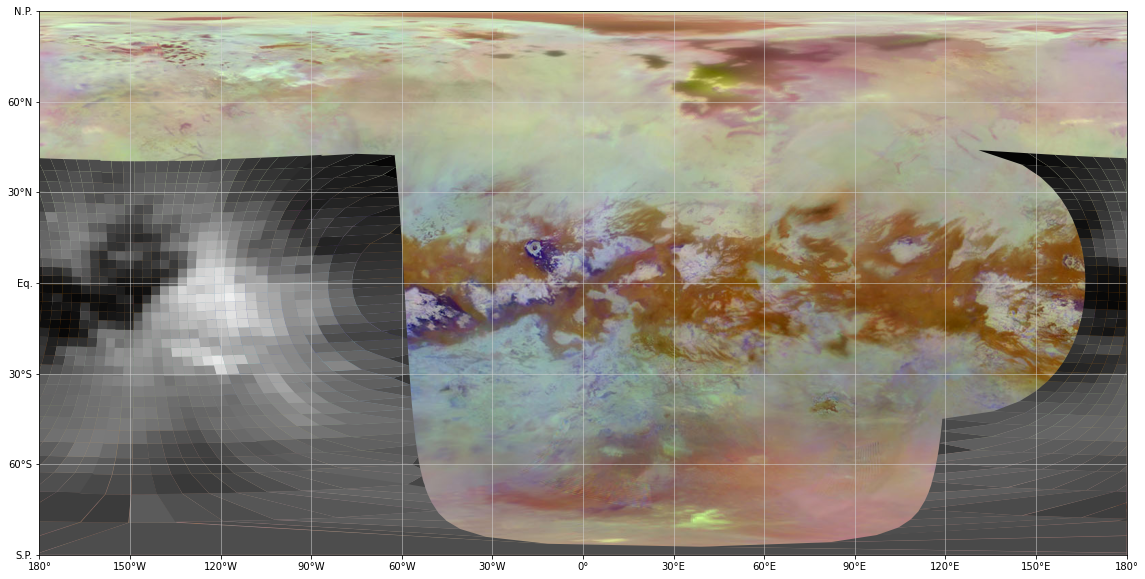

In [22]:
fig, ax = bg.figure(figsize=(20, 10))

ax.add_collection(cube.pixels(2.03, vmin=.05, vmax=.18));

### Use a custom basemap

In this example we will download ISS equirectangular map of Titan published in [PIA22770](https://photojournal.jpl.nasa.gov/catalog/PIA22770).

In [23]:
from pathlib import Path
from pyvims.wget import wget

In [24]:
filename = 'Titan_ISS.jpg'
url = 'https://photojournal.jpl.nasa.gov/jpeg/PIA22770.jpg'
root = Path('.').absolute()                                  # Folder location where the image basemap will be saved.

with Path(root) / filename as fmap:
    if not fmap.exists():
        fmap.write_bytes(wget(url))

#### Create a new `Map` object

In [25]:
from pyvims.misc import Map

Contrary to the `Titan_VIMS_ISS` map, the `Titan_ISS` map is centered at 180° and extent from 360° to 0°.

In [26]:
bg_iss = Map(filename,
             root=root,
             extent=[360, 0, -90, 90],
             projection='equirectangular',
             src='PIA22770',
             url=url)

The pixels projection are done internally, so the code does not need to be change. Here we display a color map with a RGB tuple as shown earlier.

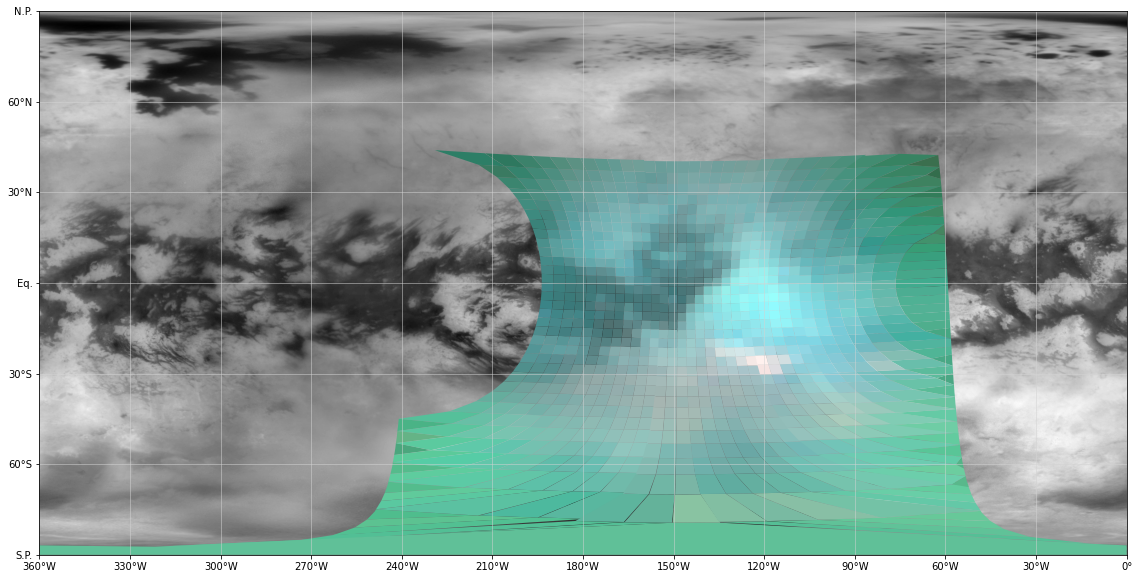

In [27]:
fig, ax = bg_iss.figure(figsize=(20, 10))

ax.add_collection(cube.pixels(('339:351', '138:141', '121:122')));

#### Save a `Map` in `MAPS` registry

You can save any `Map` in the `MAPS` registry to be able to re-use it later.

In [28]:
# bg_iss.register()  # <-- Uncomment this line

Now you get a new entry in the pyvims `MAPS` registry accessible anywhere:

In [29]:
# bg_iss = MAPS['Titan_ISS']  # <-- Uncomment this line

### Polar plot with stereographic polar basemap

Here, we download a low resolution RADAR map of Titan north pole ([PIA17655](https://photojournal.jpl.nasa.gov/catalog/PIA17655)). Hoewever, it is highly recommanded to download the [high resolution and unannoted version](https://photojournal.jpl.nasa.gov/figures/PIA17655_fig1_thumb.jpg) instead (~20 Mb).

__Note:__ the map is not squared and need to be properly cropped before being loaded by `Map`.

In [30]:
filename = 'Titan_RADAR_NPOLE.jpg'
url = 'https://photojournal.jpl.nasa.gov/jpegMod/PIA17655_modest.jpg'

with Path(filename) as fmap:
    if not fmap.exists():
        fmap.write_bytes(wget(url))
        
        # Crop the image to make it squared and centered
        plt.imsave(filename, plt.imread(filename)[3:568, 9:574])

In [31]:
bg_radar = Map(filename,
             root=root,
             extent=[-180, 180, 50, 90],
             projection='stereographic',
             src='PIA17655',
             url=url)

In addition to `add_collection` you can also `add_patch` on individual pixels.
`Map` also supports `subplots` to create multiple maps.
Here we represent the RGB composite at (`5.0 µm`, `1.58 µm` and `1.29 µm`) with a small amount of transparency on the left and the pixel (`S=20`, `L=40`) contour in red on the right.

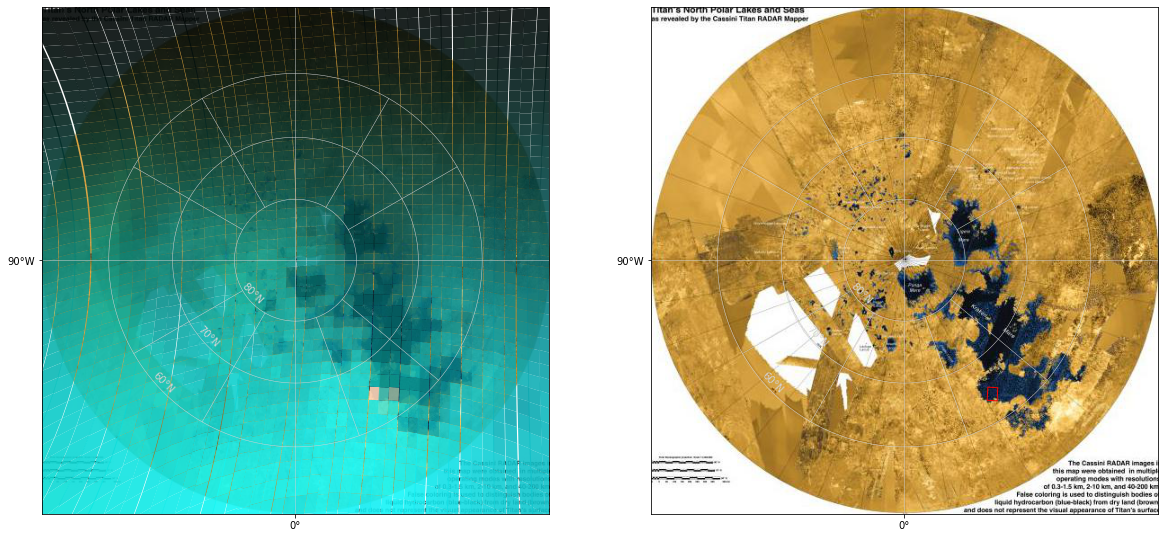

In [32]:
fig, (ax0, ax1) = bg_radar.subplots(1, 2, figsize=(20, 10))

ax0.add_collection(polar_cube.pixels((5.0, 1.58, 1.29), alpha=.9))

ax1.add_patch(polar_cube[20, 40].patch(facecolor='none', edgecolor='red'))